# Relatório sobre Alinhamento de Sequências de DNA - Supercomputação

**Aluno: Antonio Vieira Fuziy**

**Professor: Luciano Silva**

___

Para realização do relatório, é necessário realizar uma contextualização sobre os três algoritmos tratados na atividade. Dentre eles estão os itens representados abaixo:

- Smith Waterman

A implementação do algoritmo de Smith Waterman se baseia mais em exploitation, utilizando um alinhamento local que gera todas as subsequências de todos os tamanhos e compara essas subsequências através de uma matriz, calculando a melhor pontuação possível sempre que uma subsequência comparada se apresenta melhor que as outras anteriores. 

- Busca Local

Para a implementação da busca local a ideia é um pouco diferente, esse algoritmo se baseia mais em exploration e em pouco exploitation, utilizando-se de uma aleatoriedade para gerar as subsequências de diferentes tamanhos, assim através dessas sequências aleatórias calcula-se a pontuação e monta-se as sequências A e B resultantes da melhor pontuação.

- Busca Exaustiva

Por fim, para a implementação da busca exaustiva a ideia é muito focada em exploration, dessa forma ele gera todas as possíveis subsequências a fim de conseguir encontrar a melhor pontuação a partir das duas sequências de entrada.

Bibliotecas para o código

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import subprocess
plt.style.use("ggplot")

Lista de algoritmos testados

In [58]:
algorithms = [
    "exaustive_search/exaustive_search",
    "exaustive_search/parallel_exaustive_search",
]

input_directory = "./dna_sequences/all_sequences"

Função para rodar os executáveis de `C++`

In [59]:
def roda_com_entrada(executavel, algorithm):
  with open(algorithm) as f:
    start = time.perf_counter()
    proc = subprocess.run([executavel], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()
  return end-start

Função para geração de tempos dos algoritmos

In [60]:
def generate_time(algorithm, directory):
    tempos_busca = []
    dir_list = os.listdir(directory)
    for f in dir_list:
        tempos_busca.append(roda_com_entrada(algorithm,f'{directory}/{f}'))
    return tempos_busca, dir_list

Função para geração de tamanhos das sequências

In [61]:
def generate_length(directory, dir_list):
    n = []
    m = []
    for file in dir_list:
        with open(f'{directory}/{file}') as f :
            text_splitted = f.read().splitlines()
        n.append(text_splitted[0])
        m.append(text_splitted[1])
    n = [int(i) for i in n]
    m = [int(j) for j in m]
    # n.sort()
    # m.sort()
    return n, m

Executando os algoritmos para as entradas e salvando seus tempos e tamanhos de sequências

In [62]:
tempos_exaustiva_sequencial, dir_exaustiva_sequencial = generate_time(algorithms[0], input_directory)
n_exaustiva_sequencial, m_exaustiva_sequencial = generate_length(input_directory, dir_exaustiva_sequencial)

tempos_exaustiva_parallel, dir_exaustiva_parallel  = generate_time(algorithms[1], input_directory)
n_exaustiva_parallel, m_exaustiva_parallel = generate_length(input_directory, dir_exaustiva_parallel)

___

### Análise dos algoritmos

Utilizando os tempos de execução dos algoritmos e os tamanhos das sequências A e B geradas, é razoável realizar a análise e comparação dos comportamentos dos três algoritmos com sequências de vários tamanhos, assim abaixo foi exposto os gráfico 3D de **Tamanho da Sequência A X Tamanho da Sequência B X Tempo** para os algoritmos de Smith Waterman, Busca Local e Busca Exaustiva.

**Obs: Vale ressaltar que a análise foi realizada a partir de várias sequências de DNA de tamanhos diferentes, com o tamanho máximo de 300, e assim foi possível construir o relatório com análises mais aprofundadas.**

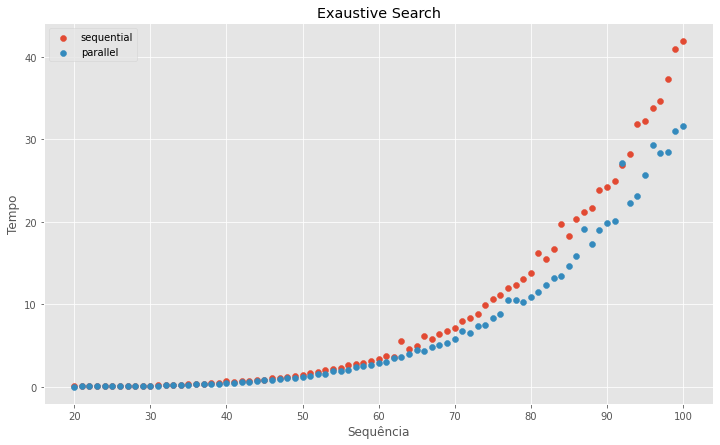

In [64]:
plt.figure(figsize=(12, 7))
plt.scatter(n_exaustiva_sequencial, tempos_exaustiva_sequencial, label="sequential")
plt.scatter(n_exaustiva_parallel, tempos_exaustiva_parallel, label="parallel")
plt.title("Exaustive Search")
plt.xlabel('Sequência')
plt.ylabel("Tempo")
plt.legend()

plt.show()

Analisando os gráficos acima pode-se identificar alguns comportamentos por parte de cada algortimo:


- **Busca Exaustiva:**

O comportamento é mais visível, uma vez que a busca exaustiva gera todas as subsequências possíveis das entradas, dessa forma quanto maior o tamanho da entrada, maior o tamanho das subsequências geradas e assim maior o tempo de processamento para o cálculo da pontuação, portanto o gŕafico apresenta um comportamento exponencial, começando com cores mais escuras quando as sequências de entrada são menores e conforme o aumento delas, o gráfico tende a ficar mais clara, demonstrando o aumento do tempo de execução. 


___

### Profiling

Para uma análise dos tempos de execução e dos pontos de lentidão dos códigos utilizou-se o `valgrind`, dessa forma foi representado abaixo cada uma das análises dos três algoritmos (Smith Waterman, Busca Local e Busca Exaustiva).

- **Busca Exaustiva:**

![profiling busca_exaustiva](busca_exaustiva_valgrind.png)

Por fim, para implementação da busca exaustiva, espera-se que o processamento demore muito mais, visto que esse algoritmo gera todas as subsequências possíveis, dessa forma observando o profiling da busca exaustiva pode-se perceber que a maior lentidão do algoritmo está presente nos loops sobre as subsequências e no cálculo da pontuação da melhor subsequência, uma vez que existem 3 for's um dentro do outro nesse fragmento do código, gerando assim milhões de iterações do algortimo.